### Research question 2: Do protein modifications differ between SPP vs. NAT?
- Maybe a particular basic protein will be dealt with in both enzymes, but one might interact with a different "flavor" of that base protein?

#### Protein Modifications
- Proteins are the building blocks of cells and play crucial roles in various biological processes. Protein modifications refer to the chemical alterations that occur to proteins after they are synthesized. These modifications can occur through several mechanisms, including enzymatic reactions, post-translational modifications (PTMs), and interactions with other molecules.
- Common types of protein modifications include phosphorylation, acetylation, methylation, glycosylation, ubiquitination, and many others. These modifications can alter a protein's structure, stability, localization, activity, and interactions with other molecules. Understanding protein modifications is essential in deciphering cellular processes, disease mechanisms, and potential therapeutic targets, such as in malaria research.

#### Plasmodium proteins signal peptide peptidase (SPP):
- Plasmodium proteins signal peptide peptidase, or SPP, is an enzyme found in the Plasmodium parasite, which causes malaria. Its main job is to process and modify proteins that are important for the parasite's survival and ability to infect human cells.
- When proteins are made in cells, they usually have a "signal peptide" attached to them. This signal peptide acts like a tag, telling the cell where the protein needs to go. However, before the protein can reach its destination, the signal peptide needs to be removed. That's where SPP comes in.
- SPP is responsible for cutting off the signal peptide from the protein. It acts like a pair of molecular scissors, recognizing the specific region of the protein where the signal peptide is attached and snipping it off. Once the signal peptide is removed, the protein can then be transported to its proper location within the Plasmodium parasite.
- The role of SPP in Plasmodium is important because it ensures that proteins are correctly processed and directed to the right places. This helps the parasite survive and carry out its infectious activities. Researchers studying malaria may be interested in understanding SPP's function and exploring its potential as a target for developing new treatments against the disease.

#### N-Acetyltransferase (NAT)
- N-Acetyltransferases (NATs) are a class of enzymes that catalyze the transfer of an acetyl group from acetyl-coenzyme A (acetyl-CoA) to the amino group of various substrates, including small molecules, drugs, and proteins. NATs are involved in the process of acetylation, one of the common post-translational modifications of proteins.
- In the context of malaria research, NATs can be of interest due to their potential involvement in the modification of proteins within the Plasmodium parasite or host cells. The acetylation of proteins mediated by NATs can affect protein stability, function, and protein-protein interactions, thereby influencing various cellular processes. By studying the role of NATs in malaria, researchers can gain insights into the molecular mechanisms underlying parasite-host interactions and identify potential targets for intervention.

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML
import os

pd.set_option('display.max_colwidth', None)

data = pd.read_excel('Malaria_Research_Data.xlsx', header=0)
total_spectra = data.groupby('Biological sample category')['Protein percentage of total spectra'].sum()

# Normalize the protein percentages within each group
# data['Normalized protein percentage'] = data.groupby('Biological sample category')['Protein percentage of total spectra'].transform(lambda x: (x / x.sum()) * 100)

# Calculate the corrected normalized protein percentage
# data['Corrected normalized protein percentage'] = data.groupby('Biological sample category')['Normalized protein percentage'].transform(lambda x: (x / x.sum()) * 100)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12876 entries, 0 to 12875
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Experiment name                       12876 non-null  object 
 1   Biological sample category            12876 non-null  object 
 2   Protein group                         12876 non-null  object 
 3   Protein accession number              12876 non-null  object 
 4   Protein name                          12876 non-null  object 
 5   Protein identification probability    12876 non-null  float64
 6   Protein percentage of total spectra   12876 non-null  float64
 7   Number of unique peptides             12876 non-null  int64  
 8   Number of unique spectra              12876 non-null  int64  
 9   Number of total spectra               12876 non-null  int64  
 10  Peptide sequence                      12876 non-null  object 
 11  Previous amino 

In [54]:
# create dataframe of only records where the Biological Sample Category is SPP
protein_mods_spp = data[data['Biological sample category'] == 'SPP']
print(f"Count of records where the Biological Sample Category is SPP\n")
display(protein_mods_spp.count())
print(f"\n")

# create dataframe of only records where the Biological Sample Category is NAT
protein_mods_nat = data[data['Biological sample category'] == 'NAT']
print(f"Count of records where the Biological Sample Category is NAT\n")
display(protein_mods_nat.count())

Count of records where the Biological Sample Category is SPP



Experiment name                         9462
Biological sample category              9462
Protein group                           9462
Protein accession number                9462
Protein name                            9462
Protein identification probability      9462
Protein percentage of total spectra     9462
Number of unique peptides               9462
Number of unique spectra                9462
Number of total spectra                 9462
Peptide sequence                        9462
Previous amino acid                     9462
Next amino acid                         9462
Peptide identification probability      9462
Modifications identified by spectrum    3341
Spectrum charge                         7301
Peptide start index                     9462
Peptide stop index                      9462
dtype: int64



Count of records where the Biological Sample Category is NAT



Experiment name                         3414
Biological sample category              3414
Protein group                           3414
Protein accession number                3414
Protein name                            3414
Protein identification probability      3414
Protein percentage of total spectra     3414
Number of unique peptides               3414
Number of unique spectra                3414
Number of total spectra                 3414
Peptide sequence                        3414
Previous amino acid                     3414
Next amino acid                         3414
Peptide identification probability      3414
Modifications identified by spectrum    1051
Spectrum charge                            0
Peptide start index                     3414
Peptide stop index                      3414
dtype: int64

In [87]:
# get count of each distinct occurance of `Modifications identified by spectrum` for SPP
spp_modifications = protein_mods_spp['Modifications identified by spectrum']
print(f"The total number of modificaitons for SPP:", spp_modifications.count())
# print(f"\nThe frequency of SPP modfications identified by spectrum:\n")
# print(spp_modifications.value_counts(sort = False))

The total number of modificaitons for SPP: 3341


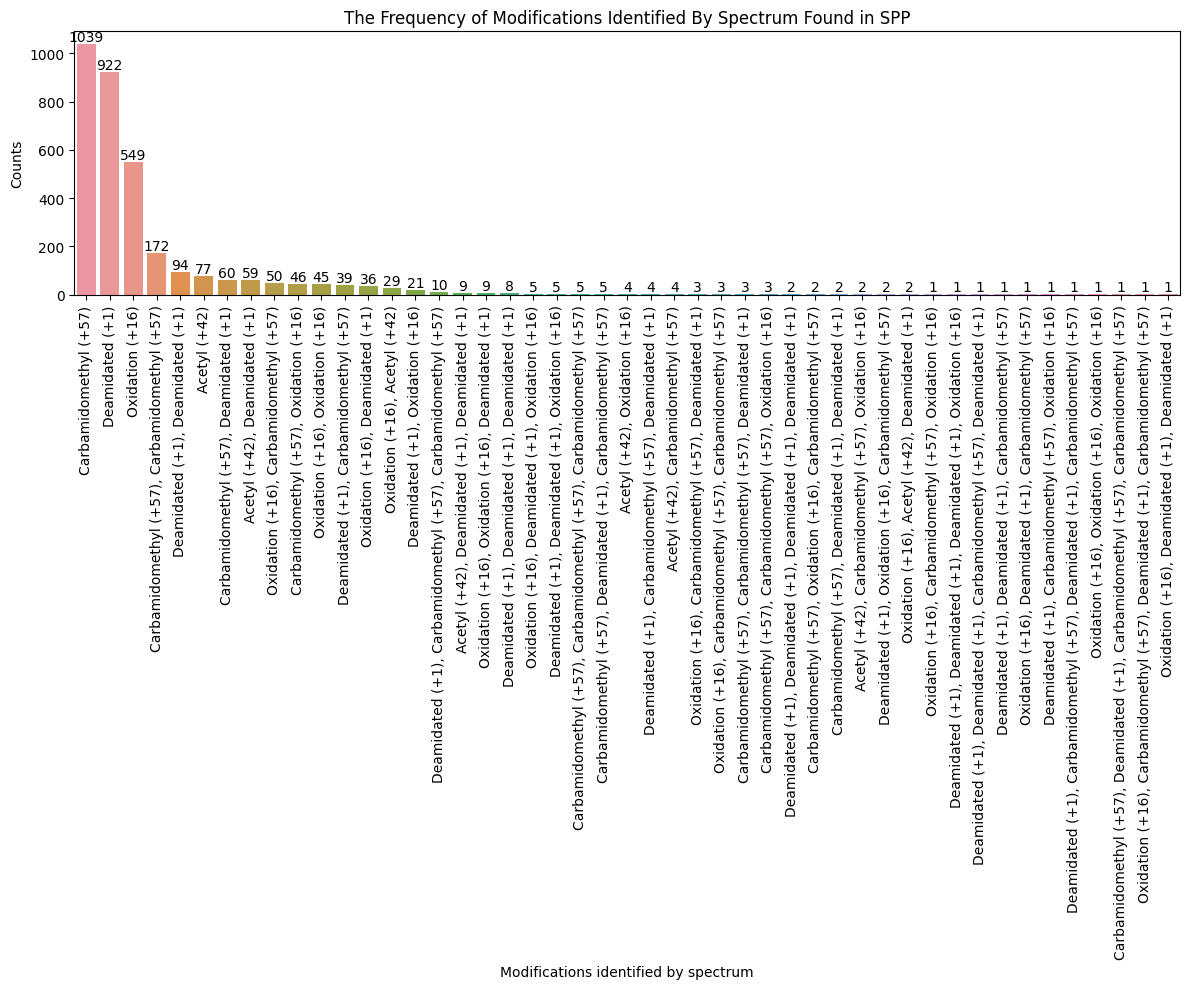

In [105]:
# display Bar Plot for the frequency of SPP modfications identified by spectrum

spp_mods_counts = spp_modifications.value_counts()
# spp_mods_counts.info()
spp_mods_counts_dict = spp_mods_counts.to_dict()
# print(spp_mods_counts_dict)

spp_mods = list(spp_mods_counts_dict.keys())
spp_counts = list(spp_mods_counts_dict.values())

# Create a bar plot
plt.figure(figsize=(12, 10))
spp_mod_plot = sns.barplot(x = spp_mods, y = spp_counts)
plt.xticks(rotation=90)
plt.xlabel('Modifications identified by spectrum')
plt.ylabel('Counts')
plt.title('The Frequency of Modifications Identified By Spectrum Found in SPP')

for i in spp_mod_plot.containers:
    spp_mod_plot.bar_label(i)

plt.tight_layout()
plt.show()


In [107]:
# get count of each distinct occurance of `Modifications identified by spectrum` for NAT
nat_modifications = protein_mods_nat['Modifications identified by spectrum']
print(f"The total number of modificaitons for NAT:", nat_modifications.count())
# print(f"\nThe frequency of NAT modfications identified by spectrum:\n")
# print(nat_modifications.value_counts(sort = False))

The total number of modificaitons for NAT: 1051


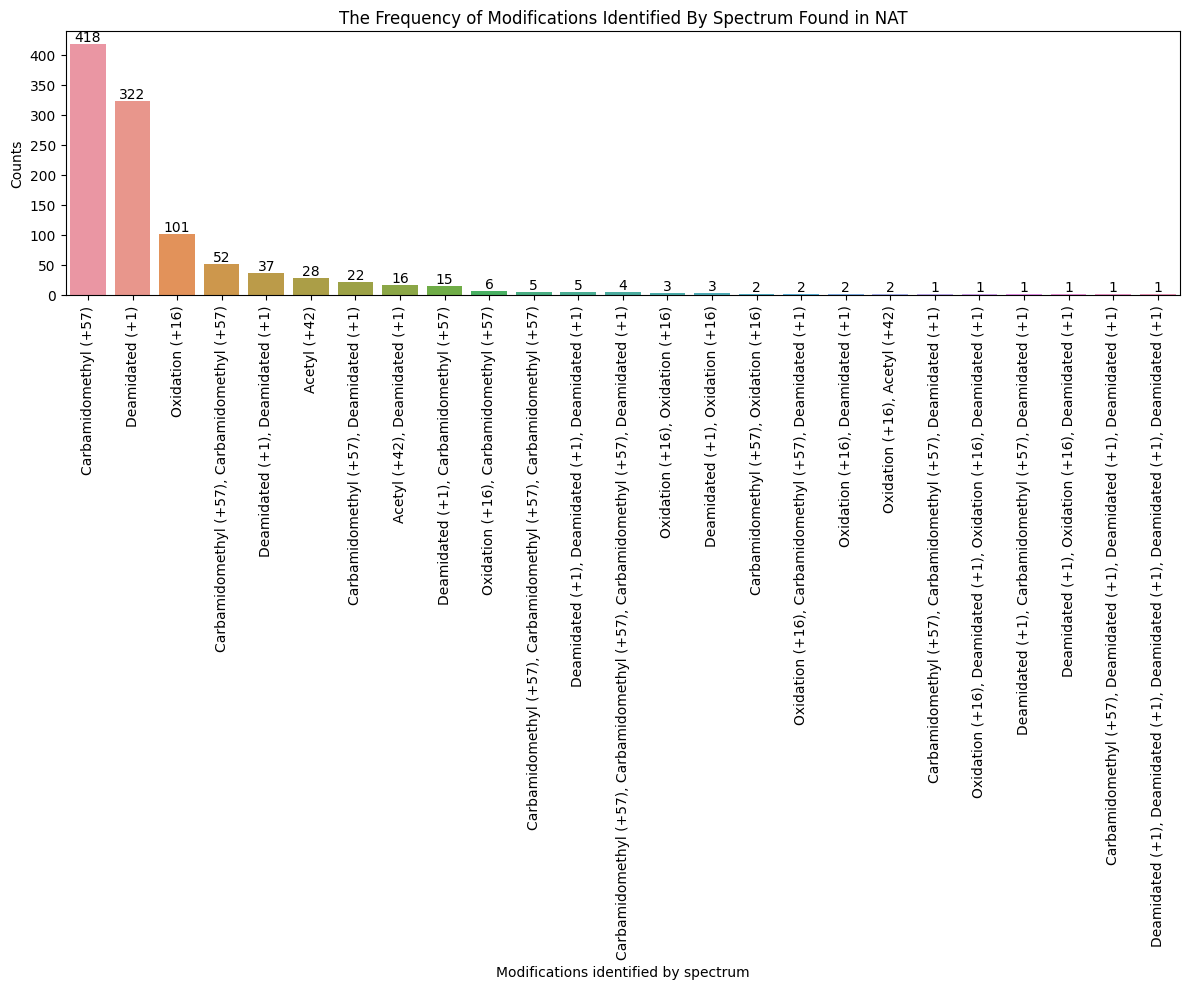

In [109]:
# display Bar Plot for the frequency of NAT modfications identified by spectrum

nat_mods_counts = nat_modifications.value_counts()
# nat_mods_counts.info()
nat_mods_counts_dict = nat_mods_counts.to_dict()
# print(nat_mods_counts_dict)

nat_mods = list(nat_mods_counts_dict.keys())
nat_counts = list(nat_mods_counts_dict.values())

# Create a bar plot
plt.figure(figsize=(12, 10))
nat_mod_plot = sns.barplot(x = nat_mods, y = nat_counts)
plt.xticks(rotation=90)
plt.xlabel('Modifications identified by spectrum')
plt.ylabel('Counts')
plt.title('The Frequency of Modifications Identified By Spectrum Found in NAT')

for i in nat_mod_plot.containers:
    nat_mod_plot.bar_label(i)

plt.tight_layout()
plt.show()

In [34]:
# find which modifications exist in SPP but not NAT
spp_mods_not_in_nat = protein_mods_spp[~protein_mods_spp['Modifications identified by spectrum'].isin(protein_mods_nat['Modifications identified by spectrum'])]
print(f"\nProtein modifcations found in SPP but not NAT.\nOutput includes Peptide Identification Probability to differiate where some records would otherwise appear to be duplicate of each other.\n")
HTML(spp_mods_not_in_nat[['Protein accession number', 'Protein name', 'Peptide sequence', 'Peptide identification probability', 'Modifications identified by spectrum']].to_html(index=False))


Protein modifcations found in SPP but not NAT.
Output includes Peptide Identification Probability to differiate where some records would otherwise appear to be duplicate of each other.



Protein accession number,Protein name,Peptide sequence,Peptide identification probability,Modifications identified by spectrum
Q8I3A3,"Ubiquitin specific protease, putative OS=Plasmodium falciparum (isolate 3D7) OX=36329 GN=PF3D7_0904600 PE=4 SV=1",KNDNIIQNNK,0.911,"Deamidated (+1), Deamidated (+1), Deamidated (+1), Deamidated (+1)"
Q8I3T8,"60S ribosomal protein L12, putative OS=Plasmodium falciparum (isolate 3D7) OX=36329 GN=PF3D7_0517000 PE=3 SV=2",EMLGTCNSIGCTVDGK,0.997,"Oxidation (+16), Carbamidomethyl (+57), Deamidated (+1), Carbamidomethyl (+57)"
Q8II57,"Structural maintenance of chromosomes protein 1, putative OS=Plasmodium falciparum (isolate 3D7) OX=36329 GN=PF3D7_1130700 PE=4 SV=1",QINCKNYLNEKK,0.929,"Deamidated (+1), Deamidated (+1), Carbamidomethyl (+57), Deamidated (+1)"
Q8IKW5,Elongation factor 2 OS=Plasmodium falciparum (isolate 3D7) OX=36329 GN=PF3D7_1451100 PE=3 SV=1,YTEQVQDVPCGNTCCLVGVDQYIVK,0.954,"Carbamidomethyl (+57), Deamidated (+1), Carbamidomethyl (+57), Carbamidomethyl (+57)"
Q8IDN6,Protein transport protein SEC61 subunit alpha OS=Plasmodium falciparum (isolate 3D7) OX=36329 GN=PF3D7_1346100 PE=3 SV=1,GTLMELGISPIVTSGMVMQLLAGSK,0.997,"Oxidation (+16), Oxidation (+16), Oxidation (+16)"
Q8I5J4,Uncharacterized protein OS=Plasmodium falciparum (isolate 3D7) OX=36329 GN=PF3D7_1221900 PE=4 SV=1,KVNKNDEDLNNNSK,0.975,"Deamidated (+1), Deamidated (+1), Deamidated (+1), Deamidated (+1)"
Q7KQL9,Fructose-bisphosphate aldolase OS=Plasmodium falciparum (isolate 3D7) OX=36329 GN=FBPA PE=1 SV=1,AHCTEYMNAPK,0.997,"Acetyl (+42), Carbamidomethyl (+57), Oxidation (+16)"
Q7KQL9,Fructose-bisphosphate aldolase OS=Plasmodium falciparum (isolate 3D7) OX=36329 GN=FBPA PE=1 SV=1,AHCTEYMNAPK,0.997,"Acetyl (+42), Carbamidomethyl (+57), Oxidation (+16)"
Q8IJT9,Eukaryotic translation initiation factor 2 subunit beta OS=Plasmodium falciparum (isolate 3D7) OX=36329 GN=PF3D7_1010600 PE=3 SV=1,YITEYVTCQMCK,0.979,"Carbamidomethyl (+57), Oxidation (+16), Carbamidomethyl (+57)"
Q8IJT9,Eukaryotic translation initiation factor 2 subunit beta OS=Plasmodium falciparum (isolate 3D7) OX=36329 GN=PF3D7_1010600 PE=3 SV=1,YITEYVTCQMCK,0.989,"Carbamidomethyl (+57), Oxidation (+16), Carbamidomethyl (+57)"


In [47]:
# find which modifications exist in NAT but not SPP
nat_mods_not_in_spp = protein_mods_nat[~protein_mods_nat['Modifications identified by spectrum'].isin(protein_mods_spp['Modifications identified by spectrum'])]
print(f"\nProtein modifcations found in NAT but not SPP.\nOutput includes Peptide Identification Probability to differiate where some records would otherwise appear to be duplicate of each other.\n")
HTML(nat_mods_not_in_spp[['Protein accession number', 'Protein name', 'Peptide sequence', 'Peptide identification probability', 'Modifications identified by spectrum']].to_html(index=False))


Protein modifcations found in NAT but not SPP.
Output includes Peptide Identification Probability to differiate where some records would otherwise appear to be duplicate of each other.



Protein accession number,Protein name,Peptide sequence,Peptide identification probability,Modifications identified by spectrum
Q8I5Y5,Shewanella-like protein phosphatase 2 OS=Plasmodium falciparum (isolate 3D7) OX=36329 GN=PF3D7_1206000 PE=4 SV=1,FCVCCYNGPTFNR,0.934,"Carbamidomethyl (+57), Carbamidomethyl (+57), Carbamidomethyl (+57), Deamidated (+1)"
Q8I5Y5,Shewanella-like protein phosphatase 2 OS=Plasmodium falciparum (isolate 3D7) OX=36329 GN=PF3D7_1206000 PE=4 SV=1,FCVCCYNGPTFNR,0.938,"Carbamidomethyl (+57), Carbamidomethyl (+57), Carbamidomethyl (+57), Deamidated (+1)"
Q8I5Y5,Shewanella-like protein phosphatase 2 OS=Plasmodium falciparum (isolate 3D7) OX=36329 GN=PF3D7_1206000 PE=4 SV=1,FCVCCYNGPTFNR,0.997,"Carbamidomethyl (+57), Carbamidomethyl (+57), Carbamidomethyl (+57), Deamidated (+1)"
Q8I5Y5,Shewanella-like protein phosphatase 2 OS=Plasmodium falciparum (isolate 3D7) OX=36329 GN=PF3D7_1206000 PE=4 SV=1,FCVCCYNGPTFNR,0.997,"Carbamidomethyl (+57), Carbamidomethyl (+57), Carbamidomethyl (+57), Deamidated (+1)"
Q8IIC8,Golgi protein 2 OS=Plasmodium falciparum (isolate 3D7) OX=36329 GN=PF3D7_1123500 PE=4 SV=1,NKMIDYTNMLQRSK,0.945,"Oxidation (+16), Deamidated (+1), Oxidation (+16), Deamidated (+1)"
Q8IBQ6,"60S ribosomal protein L11a, putative OS=Plasmodium falciparum (isolate 3D7) OX=36329 GN=PF3D7_0719600 PE=1 SV=1",EQNVMREIKVNK,0.924,"Deamidated (+1), Oxidation (+16), Deamidated (+1)"
Q8IL96,"N-acetyltransferase, GNAT family, putative OS=Plasmodium falciparum (isolate 3D7) OX=36329 GN=PF3D7_1437000 PE=4 SV=2",NNNDTCNEQNKDNNNNNNNNNNNNNNQLSK,0.937,"Carbamidomethyl (+57), Deamidated (+1), Deamidated (+1), Deamidated (+1)"
Q8ID94|YPF12_PLAF7-DECOY,Q8ID94|YPF12_PLAF7-DECOY,IDDPINMSSMVGPVLNNDMNTINNNVTSNKK,0.923,"Deamidated (+1), Deamidated (+1), Deamidated (+1), Deamidated (+1), Deamidated (+1)"
